# Face mask Image classification

### Import necessary libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from tensorflow import keras
from sklearn.model_selection import train_test_split
from glob import glob
import os
from skimage.transform import resize
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Fetch the Training data

In [62]:
with_mask=glob('with_mask 1/with_mask 1/*.jpg')
without_mask=glob('without_mask/without_mask/*.jpg')

### Find the number of images of all classes 


In [63]:
print('Numbers of images:')
print(f'with_mask:{len(with_mask)}')
print(f'with_mask:{len(without_mask)}')

Numbers of images:
with_mask:1696
with_mask:1792


### Store all the images inside a list and create a list with the corresponding labels

In [102]:
images=[]
labels=[]
for i in with_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in without_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

In [103]:
label={0:'with_mask',1:'without_mask'}

### plot some images

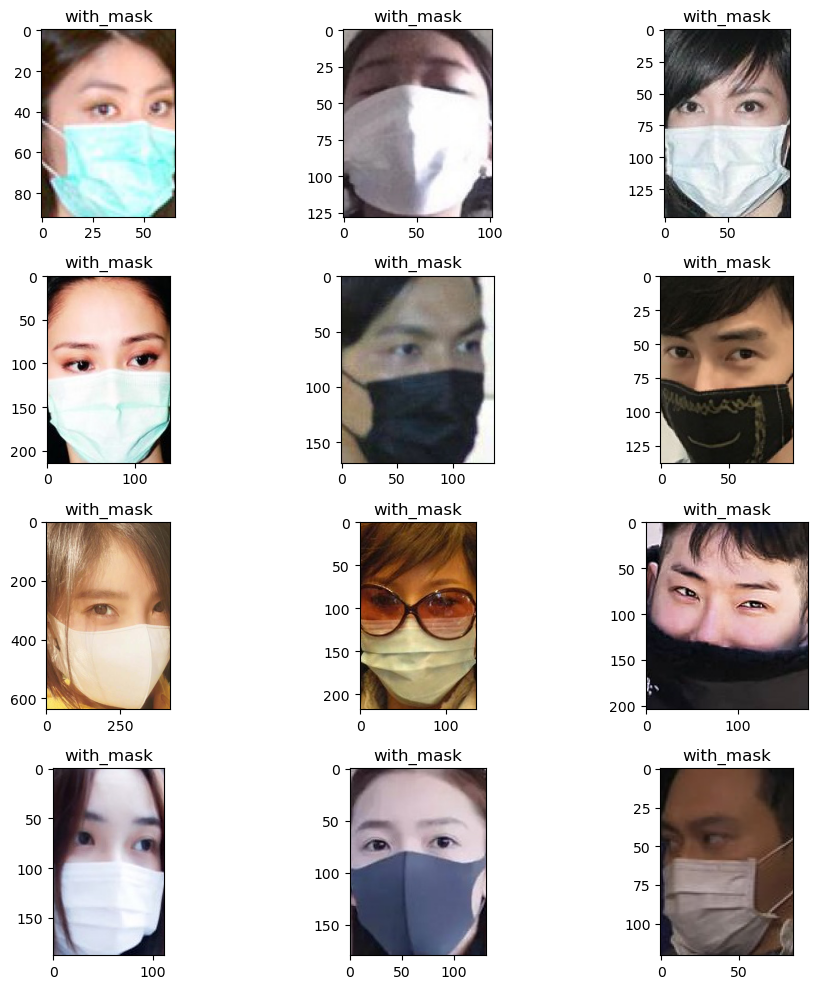

In [104]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Shuffle both image list and label list (In both Training and testing set)

In [105]:
images,labels=shuffle(images,labels)

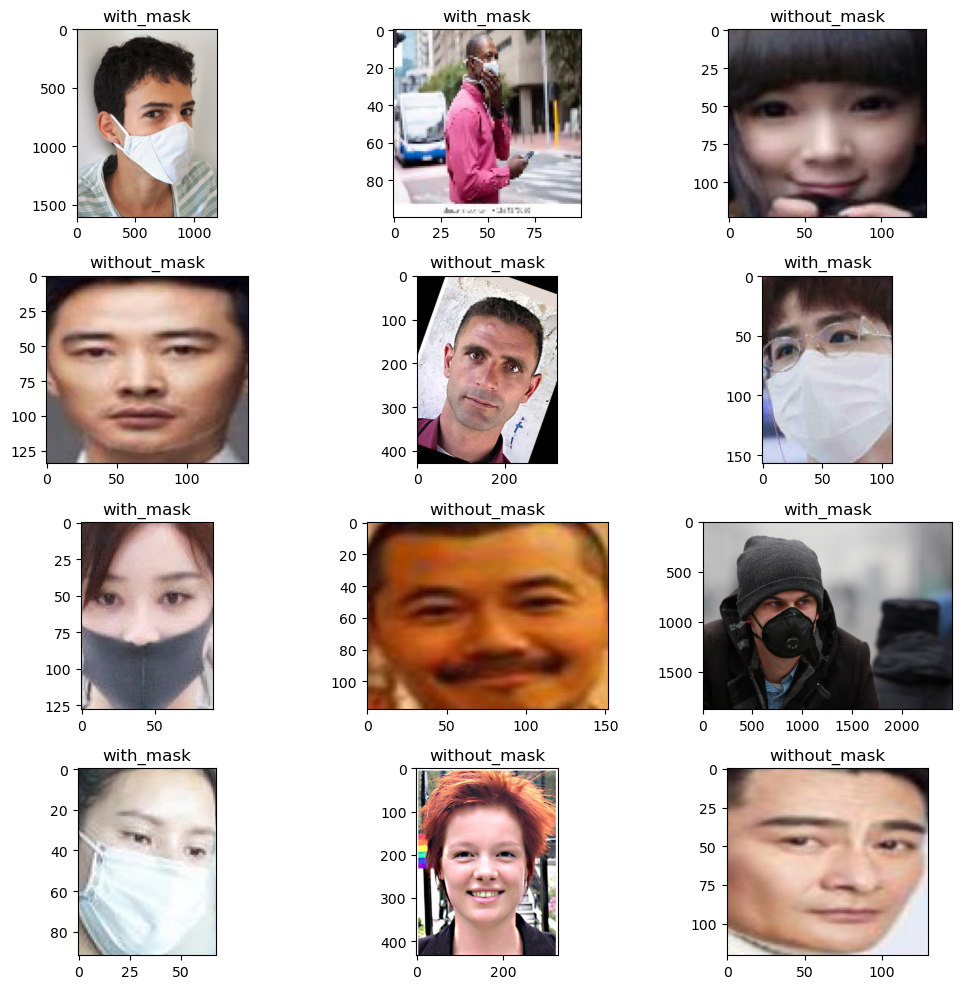

In [106]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Check the shape of the first 10 images in our list (Either from training or test set)

In [107]:
for i in range(12):
    print(images[i].shape)

(1600, 1200, 3)
(100, 100, 3)
(123, 130, 3)
(134, 144, 3)
(428, 320, 3)
(157, 109, 3)
(128, 90, 3)
(118, 152, 3)
(1876, 2500, 3)
(92, 68, 3)
(433, 327, 3)
(121, 130, 3)


### Reshape the images to 64x64( For both training and testing set)

In [108]:
x=[]
for i in images:
    x.append(resize(i,(64,64,3)))
x=np.array(x)

### Plot some of our reshaped images

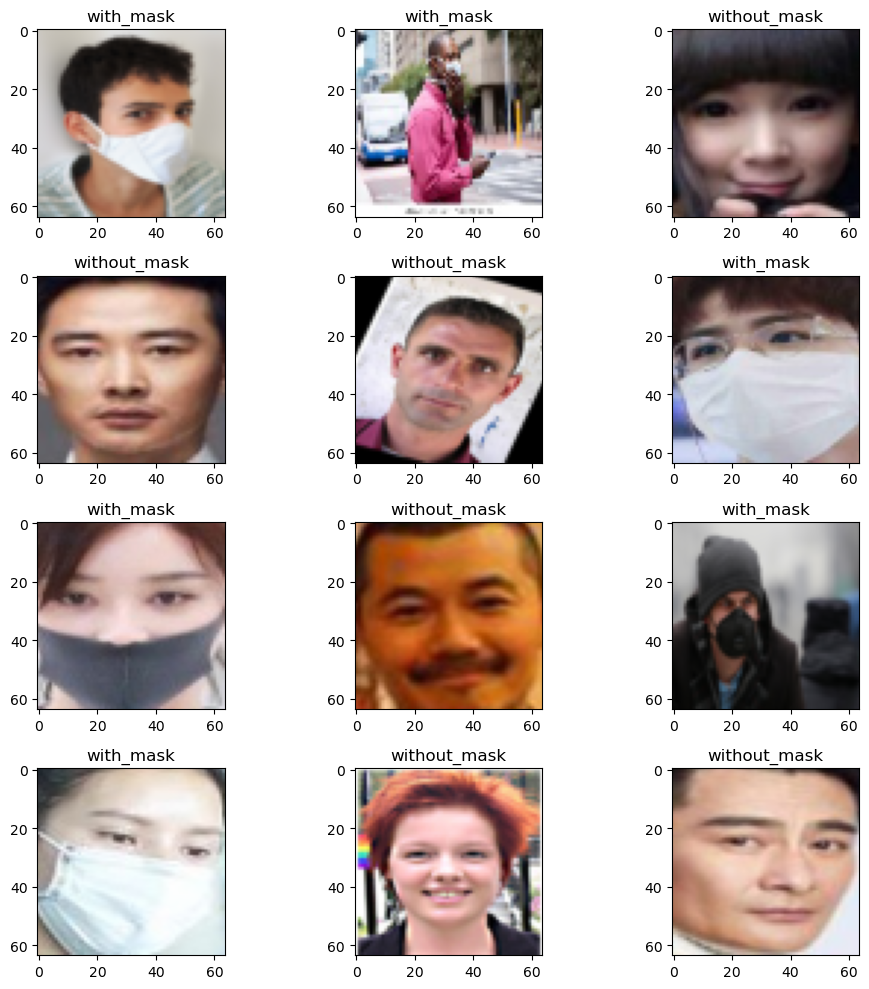

In [109]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(x[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Split into input and target variable

In [110]:
y.shape

(3488,)

In [111]:
x.shape

(3488, 64, 64, 3)

In [112]:
y=np.array(labels)

### Split the Dataset into train,test,split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [119]:
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(3,activation='softmax'),
    keras.layers.Dense(3,activation='softmax')
    
    
])

In [120]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_15 (Dense)            (None, 3)                

In [121]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

### Compile the model

In [122]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model. 


In [123]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
102/102 [==============================] - 18s 164ms/step - loss: 1.1446 - accuracy: 0.4866 - val_loss: 1.1063 - val_accuracy: 0.4620
Epoch 2/10
102/102 [==============================] - 16s 158ms/step - loss: 1.0353 - accuracy: 0.4866 - val_loss: 1.0065 - val_accuracy: 0.4620
Epoch 3/10
102/102 [==============================] - 16s 153ms/step - loss: 0.9549 - accuracy: 0.4866 - val_loss: 0.9333 - val_accuracy: 0.4620
Epoch 4/10
102/102 [==============================] - 16s 155ms/step - loss: 0.8968 - accuracy: 0.4866 - val_loss: 0.8803 - val_accuracy: 0.4620
Epoch 5/10
102/102 [==============================] - 16s 153ms/step - loss: 0.8549 - accuracy: 0.4866 - val_loss: 0.8429 - val_accuracy: 0.4620
Epoch 6/10
102/102 [==============================] - 15s 151ms/step - loss: 0.8245 - accuracy: 0.4866 - val_loss: 0.8150 - val_accuracy: 0.4620
Epoch 7/10
102/102 [==============================] - 15s 150ms/step - loss: 0.8019 - accuracy: 0.4866 - val_loss: 0.7939 - val_ac

### Evaluate the model

In [124]:
model.evaluate(x_train,y_train)

107/107 [==============================] - 5s 44ms/step - loss: 0.7562 - accuracy: 0.4854


[0.7562388777732849, 0.48537155985832214]

### Make predictions with X_test

In [126]:
y_pred=model.predict(x_test)

3/3 [==============================] - 0s 45ms/step


### Use np.argmax to fetch indices of max element of the array

In [127]:
y_pred=[np.argmax(i) for i in y_pred]

### check accuracy of the dataset

In [128]:
accuracy_score(y_test,y_pred)

0.5285714285714286

### Visualise confusion matrix on a heatmap

<Axes: >

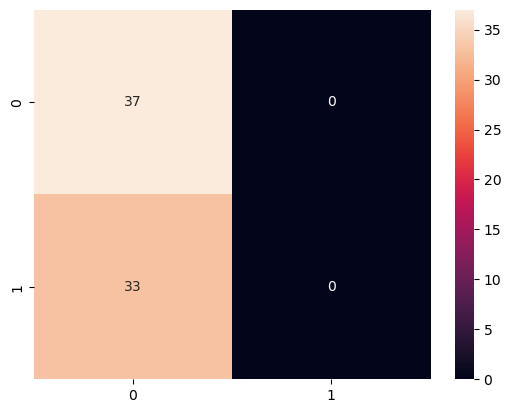

In [130]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### print classification report

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        37
           1       0.00      0.00      0.00        33

    accuracy                           0.53        70
   macro avg       0.26      0.50      0.35        70
weighted avg       0.28      0.53      0.37        70



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
